# Explore the Radar Data!
The data has to be uncompressed before it can be explored.
This is done on a unix system via the following commands:

tar -xvf radaryyyyx.tar

gunzip radar.yyyymmdd.hh.dat.gz

Once all the data is in a nice folder in the same directory as this jupyter notebook, the fun can begin!

In [ ]:
# The usual import suspects!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# A useful function!
The following function was given to us by the managers of the radar data.


In [ ]:
def data_read_display(filename):
    """ 
	when passed the full filename (path plus filename) of a deep learning dataset
	This function reads the binary data and rescales it
	reforms it from vector into array of the proper size
	rails the data off at suggested maximum and minimum values
	displays the data based on style, where style is cmap=style
    """
    dims = (126,201)   # rows, columns

    minmax = [0,30]	# suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall

    data = np.fromfile(filename,dtype='int16',count=-1,sep='') # 2 byte integers
    print('size of read vector',len(data))
    data = np.reshape(data,dims)

    if (np.max(data) > 0):

        # scale data to between 0 and 1 then rail off the extremes
        if (minmax[0] > 0 or minmax[1] > 0):
            data = (data - minmax[0])/(minmax[1] - minmax[0])
            data[(data < minmax[0])] = minmax[0]
            data[(data > minmax[1])] = minmax[1]
        else:
            data = (data - np.min(data))/(np.max(data) - np.min(data))

    else:
        print('empty hour!')

    # display image as grayscale
    plt.ion()  # needed if running from command line
    plt.imshow(data, cmap="gray", origin='lower')

In [ ]:
# let's look at our very first data file- june 1, 2008 midnight
data_read_display("radar_data/radar2008a/radar.20080601.00.dat")

In [ ]:
def data_read_return(filename):
    """
    filename should be a string with the filepath to the
    .dat file to be rescaled and returned as an np array
    """
    
    dims = (126,201) # rows, columns
    minmax = [0,30] # suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall

    data = np.fromfile(filename,dtype='int16',count=-1,sep='') # 2 byte integers
    # print('size of read vector',len(data))
    data = np.reshape(data,dims)
        
    return data

In [ ]:
data = data_read_return("radar_data/radar2008a/radar.20080601.01.dat")
print(data)

In [ ]:
def filepath_list(part_filepath, num_of_days):
    """
    part_filename: This string takes the initial pathing of the file up to the month, not the entire path
    num_of_days: This integer should be the number of days in the particular filepath month
    This function returns a list of file's with the appropriate endings for the radar data.
    """
    list_ = []
    s = "" # string
    for day in range(num_of_days): # 30 days in june 
        for hour in range(24): # 24 hours per day
            if (day < 10 and hour < 10):
                s = part_filepath + "0" + str(day+1) + ".0" + str(hour) + ".dat" 
            elif (day < 10 and hour >= 10):
                s = part_filepath + "0" + str(day+1) + "." + str(hour) + ".dat"
            elif (day >= 10 & hour < 10):
                s = part_filepath + str(day+1) + ".0" + str(hour) + ".dat"
            else:
                s = part_filepath + str(day+1) + "." + str(hour) + ".dat"
            list_.append(s)
    return list_

In [ ]:
june_2008 = filepath_list("radar_data/radar2008a/radar.200806", 30)
print(june_2008)

In [ ]:
def file_list_data(filepath_list):
    """
    filepath_list: This list of strings should contain the filepath's to the particular month of radar data
    This function returns a 3D numpy array of the data. 
    The first two dimensions contain the data on that particular hour of that particular day.
    The third dimension corresponds to which particular hour of that month to view
    """ 

In [ ]:
datas = [] # empty list
for path in paths: # go through the list of filepaths
    datas.append(data_read_return(path))

In [ ]:
datas

In [ ]:
plt.imshow(datas[0], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[1], cmap="Paired", origin='lower')

In [ ]:
np.min(datas[0])

In [ ]:
np.max(datas[0])

In [ ]:
np.mean(datas[0])

In [ ]:
np.shape(datas[0])

In [ ]:
plt.hist(datas[0])
plt.show()

In [ ]:
plt.hist(datas[0], bins=5)
plt.show()

In [ ]:
plt.hist(datas[1], bins=5)
plt.show()

In [ ]:
plt.hist(datas[2], bins=5)
plt.show()

In [ ]:
plt.imshow(datas[0], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[1], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[2], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[3], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[4], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[5], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[6], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[7], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[8], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[9], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[10], cmap="Paired", origin='lower')

In [ ]:
plt.imshow(datas[11], cmap="Paired", origin='lower')

In [ ]:
ims = []
for i in range(len(datas)):
    ims.append(plt.imshow(datas[i], cmap="Paired", origin='lower', animated=True))

fig = plt.figure(figsize=(126,201))
ami = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

In [ ]:
datas[0]

In [ ]:
print(type(datas[0]))

In [ ]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_01.nc'  # Your filename
nc_fid = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
#print(nc_fid.file_format)
print(nc_fid)

data = nc_fid.variables
nc_fid.close()

In [ ]:
filename = "radar_data/radar2008a/radar.20080601.01.dat"

dims = (126,201)   # rows, columns
minmax = [0,30]	# suggested data limits for display purposes

# set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
# [0,30] mm/hr is a good range for rainfall

data = np.fromfile(filename,dtype='int16',count=-1,sep='') # 2 byte integers
print('size of read vector',len(data))
data = np.reshape(data,dims)

if (np.max(data) > 0):

    # scale data to between 0 and 1 then rail off the extremes
    if (minmax[0] > 0 or minmax[1] > 0):
        data = (data - minmax[0])/(minmax[1] - minmax[0])
        data[(data < minmax[0])] = minmax[0]
        data[(data > minmax[1])] = minmax[1]
    else:
        data = (data - np.min(data))/(np.max(data) - np.min(data))

else:
    print('empty hour!')

# display image as grayscale
plt.ion()  # needed if running from command line
plt.imshow(data, cmap="gray", origin='lower')

print(data)

In [ ]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_01.nc'  # Your filename
band_01 = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
#print(nc_fid.file_format)
#print(nc_fid)
data = band_01.variables['data'][:]
print(data[0])
plt.imshow(data[0], cmap="gray", origin="lower")
nc_fid.close()

In [ ]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_02.nc'  # Your filename
band_01 = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
#print(nc_fid.file_format)
#print(nc_fid)
data = band_01.variables['data'][:]
print(data[0])
plt.imshow(data[0], cmap="gray", origin="lower")
nc_fid.close()

In [ ]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_03.nc'  # Your filename
band_01 = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
#print(nc_fid.file_format)
#print(nc_fid)
data = band_01.variables['data'][:]
print(data[0])
plt.imshow(data[0], cmap="gray", origin="lower")
nc_fid.close()

In [ ]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_04.nc'  # Your filename
band_01 = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
#print(nc_fid.file_format)
#print(nc_fid)
data = band_01.variables['data'][:]
print(data[0])
plt.imshow(data[0], cmap="gray", origin="lower")
nc_fid.close()

In [ ]:
for row in range(100):
    for col in range(50):
        plt.scatter(row, col, s=data)
plt.show()

# Re-exploring Radar Data for Display Purposes

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_to_directory = "/mnt/data-weather/raddata/"
directory = os.fsencode(path_to_directory)

for file in os.listdir(directory):
    filename = os.fsdecode(file) # Gets the filename of every file in "path_to_directory"
    print(filename)

radar.20171229.21.dat
radar.20171229.22.dat
radar.20171229.23.dat
radar.20171230.00.dat
radar.20171230.01.dat
radar.20171230.02.dat
radar.20171230.03.dat
radar.20171230.04.dat
radar.20171230.05.dat
radar.20171230.06.dat
radar.20171230.07.dat
radar.20171230.08.dat
radar.20171230.10.dat
radar.20171230.12.dat
radar.20171230.13.dat
radar.20171230.14.dat
radar.20171230.15.dat
radar.20171230.16.dat
radar.20171230.17.dat
radar.20171230.18.dat
radar.20171230.19.dat
radar.20171230.20.dat
radar.20171230.21.dat
radar.20171230.22.dat
radar.20171230.23.dat
radar.20171231.00.dat
radar.20171231.01.dat
radar.20171231.02.dat
radar.20171231.03.dat
radar.20171231.04.dat
radar.20171231.05.dat
radar.20171231.06.dat
radar.20171231.07.dat
radar.20171231.08.dat
radar.20171231.09.dat
radar.20171231.10.dat
radar.20171231.11.dat
radar.20171231.12.dat
radar.20171231.13.dat
radar.20171231.14.dat
radar.20171231.15.dat
radar.20171231.16.dat
radar.20171231.17.dat
radar.20171231.18.dat
radar.20171231.19.dat
radar.2017

radar.20170810.13.dat
radar.20170810.14.dat
radar.20170810.15.dat
radar.20170810.16.dat
radar.20170810.17.dat
radar.20170810.18.dat
radar.20170810.19.dat
radar.20170810.20.dat
radar.20170810.21.dat
radar.20170810.22.dat
radar.20170810.23.dat
radar.20170811.00.dat
radar.20170811.01.dat
radar.20170811.02.dat
radar.20170811.03.dat
radar.20170811.04.dat
radar.20170811.05.dat
radar.20170811.06.dat
radar.20170811.07.dat
radar.20170811.08.dat
radar.20170811.09.dat
radar.20170811.10.dat
radar.20170811.11.dat
radar.20170811.12.dat
radar.20170811.13.dat
radar.20170811.14.dat
radar.20170811.15.dat
radar.20170811.16.dat
radar.20170811.17.dat
radar.20170811.18.dat
radar.20170811.19.dat
radar.20170811.20.dat
radar.20170811.21.dat
radar.20170811.22.dat
radar.20170811.23.dat
radar.20170812.00.dat
radar.20170812.01.dat
radar.20170812.02.dat
radar.20170812.03.dat
radar.20170803.00.dat
radar.20170803.01.dat
radar.20170803.02.dat
radar.20170803.03.dat
radar.20170803.04.dat
radar.20170803.05.dat
radar.2017

radar.20170423.10.dat
radar.20170423.11.dat
radar.20170423.12.dat
radar.20170423.13.dat
radar.20170423.14.dat
radar.20170423.15.dat
radar.20170423.16.dat
radar.20170423.17.dat
radar.20170423.18.dat
radar.20170423.19.dat
radar.20170423.20.dat
radar.20170423.21.dat
radar.20170423.22.dat
radar.20170423.23.dat
radar.20170424.00.dat
radar.20170424.01.dat
radar.20170424.02.dat
radar.20170424.03.dat
radar.20170424.04.dat
radar.20170424.05.dat
radar.20170424.06.dat
radar.20170424.07.dat
radar.20170424.08.dat
radar.20170424.09.dat
radar.20170424.10.dat
radar.20170424.11.dat
radar.20170424.12.dat
radar.20170424.13.dat
radar.20170424.14.dat
radar.20170424.15.dat
radar.20170424.16.dat
radar.20170424.17.dat
radar.20170424.18.dat
radar.20170424.19.dat
radar.20170424.20.dat
radar.20170424.21.dat
radar.20170424.22.dat
radar.20170424.23.dat
radar.20170425.00.dat
radar.20170425.01.dat
radar.20170425.02.dat
radar.20170425.03.dat
radar.20170425.04.dat
radar.20170425.05.dat
radar.20170425.06.dat
radar.2017

In [44]:
data = np.fromfile(path_to_directory+"/radar.20170101.00.dat", dtype='int16')
print(data.shape)
dims = (126,201) # giving by Brian's data_read_display function
data = np.reshape(data,dims)

(25326,)


In [16]:
print(data.shape)

(126, 201)


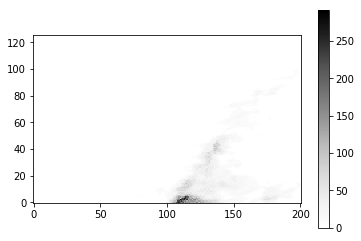

In [31]:
plt.imshow(data, cmap="Greys", origin='lower')
plt.colorbar()

In [20]:
print(data.min(), data.max())

0 291


In [35]:
temp = data
temp = temp/temp.max()
temp = temp*30
print(temp.min(), temp.max())

0.0 30.0


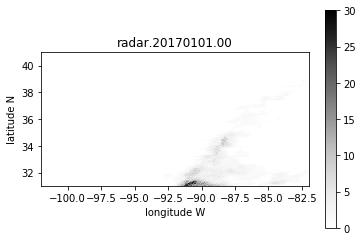

In [43]:
plt.imshow(temp, cmap="Greys", origin='lower', extent=(-102,-82,31,41))
plt.colorbar()
plt.title("radar.20170101.00")
plt.xlabel("longitude W")
plt.ylabel("latitude N")
plt.savefig("radar.png")

In [40]:
x = np.linspace(-102,-82,201)
y = np.linspace(31, 41, 126)
print(x, y)

[-102.  -101.9 -101.8 -101.7 -101.6 -101.5 -101.4 -101.3 -101.2 -101.1
 -101.  -100.9 -100.8 -100.7 -100.6 -100.5 -100.4 -100.3 -100.2 -100.1
 -100.   -99.9  -99.8  -99.7  -99.6  -99.5  -99.4  -99.3  -99.2  -99.1
  -99.   -98.9  -98.8  -98.7  -98.6  -98.5  -98.4  -98.3  -98.2  -98.1
  -98.   -97.9  -97.8  -97.7  -97.6  -97.5  -97.4  -97.3  -97.2  -97.1
  -97.   -96.9  -96.8  -96.7  -96.6  -96.5  -96.4  -96.3  -96.2  -96.1
  -96.   -95.9  -95.8  -95.7  -95.6  -95.5  -95.4  -95.3  -95.2  -95.1
  -95.   -94.9  -94.8  -94.7  -94.6  -94.5  -94.4  -94.3  -94.2  -94.1
  -94.   -93.9  -93.8  -93.7  -93.6  -93.5  -93.4  -93.3  -93.2  -93.1
  -93.   -92.9  -92.8  -92.7  -92.6  -92.5  -92.4  -92.3  -92.2  -92.1
  -92.   -91.9  -91.8  -91.7  -91.6  -91.5  -91.4  -91.3  -91.2  -91.1
  -91.   -90.9  -90.8  -90.7  -90.6  -90.5  -90.4  -90.3  -90.2  -90.1
  -90.   -89.9  -89.8  -89.7  -89.6  -89.5  -89.4  -89.3  -89.2  -89.1
  -89.   -88.9  -88.8  -88.7  -88.6  -88.5  -88.4  -88.3  -88.2  -88.1
  -88.